jupyter notebook --NotebookApp.allow_origin='https://colab.research.google.com' \ --port=9090 --no-browser

In [1]:
#pip install lightgbm

In [2]:
#pip install category_encoders

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from functools import reduce ,partial
import itertools
from sklearn.preprocessing import OrdinalEncoder
from category_encoders import *
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from statistics import mean
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.pipeline import Pipeline

In [4]:
np.random.seed(7)

# Load data

In [5]:
static_data = pd.read_csv('https://raw.githubusercontent.com/Mennatallah98/databases/main/Static_dataset.csv')
# kafka_data =  pd.read_csv('https://raw.githubusercontent.com/Mennatallah98/databases/main/Kafka_dataset.csv')

In [6]:
#static_data = pd.read_csv('D:/DEBI/uOttawa/AI for cyber security/assignment 3/Static_dataset.csv')

# Static Model

## Data analysis

In [7]:
static_data.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [8]:
static_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268074 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268074 non-null  object 
 1   FQDN_count        268074 non-null  int64  
 2   subdomain_length  268074 non-null  int64  
 3   upper             268074 non-null  int64  
 4   lower             268074 non-null  int64  
 5   numeric           268074 non-null  int64  
 6   entropy           268074 non-null  float64
 7   special           268074 non-null  int64  
 8   labels            268074 non-null  int64  
 9   labels_max        268074 non-null  int64  
 10  labels_average    268074 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268074 non-null  object 
 13  len               268074 non-null  int64  
 14  subdomain         268074 non-null  int64  
 15  Target Attack     268074 non-null  int64  
dtypes: float64(2), int64

statistical data analysis

In [93]:
import dataframe_image as dfi
dfi.export(static_data.describe(),'table.png')

In [9]:
static_data.describe()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,Target Attack
count,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000,268074.000000
mean,22.286596,6.059021,0.845420,10.410014,6.497586,2.485735,4.533577,4.788823,8.252233,4.802239,12.576714,0.753497,0.549024
std,6.001205,3.899505,4.941929,3.207725,4.499866,0.407709,2.187683,1.803256,4.415355,4.573066,4.177828,0.430975,0.497592
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000
25%,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,11.000000,1.000000,0.000000
50%,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,12.000000,1.000000,1.000000
75%,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,14.000000,1.000000,1.000000
max,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,33.000000,1.000000,1.000000


plotting data correlation

<AxesSubplot:>

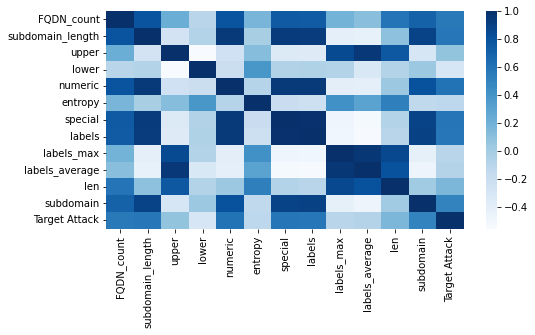

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(static_data.corr(),cmap='Blues',annot=False)

### Data distribution


In [11]:
static_data_np = static_data.to_numpy()
features_no = np.shape(static_data_np)[1]

In [12]:
static_data.columns

Index(['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower',
       'numeric', 'entropy', 'special', 'labels', 'labels_max',
       'labels_average', 'longest_word', 'sld', 'len', 'subdomain',
       'Target Attack'],
      dtype='object')

timestamp


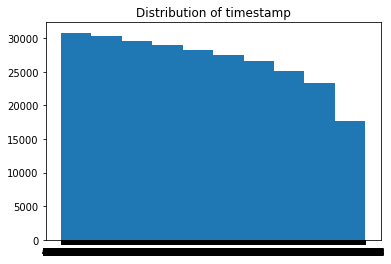

FQDN_count


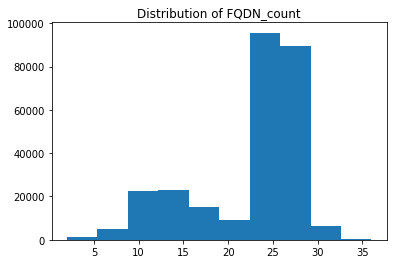

subdomain_length


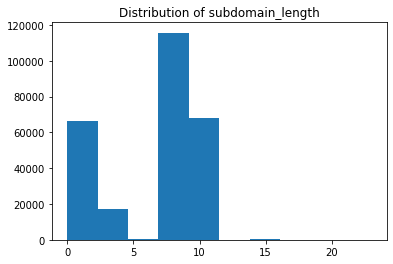

upper


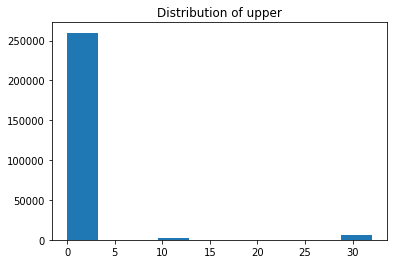

lower


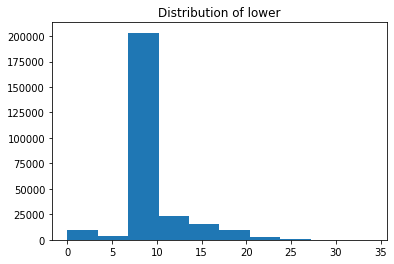

numeric


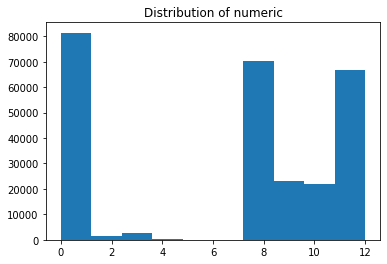

entropy


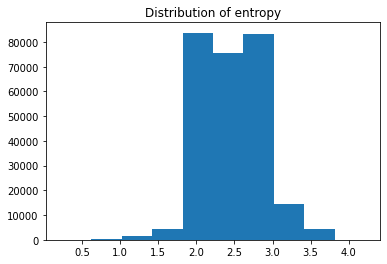

special


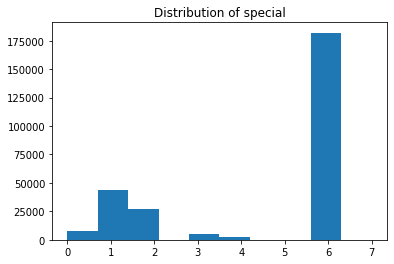

labels


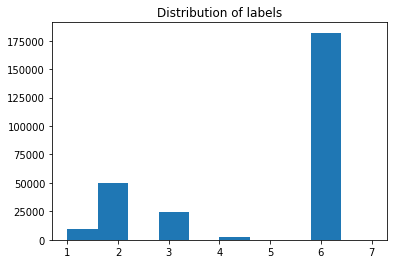

labels_max


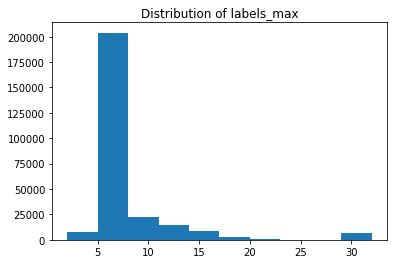

labels_average


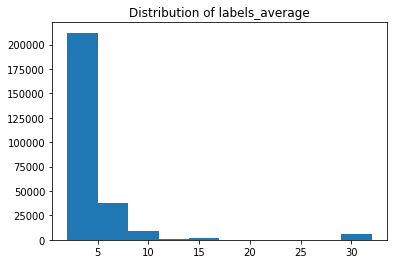

longest_word


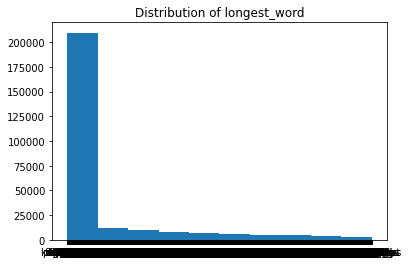

sld


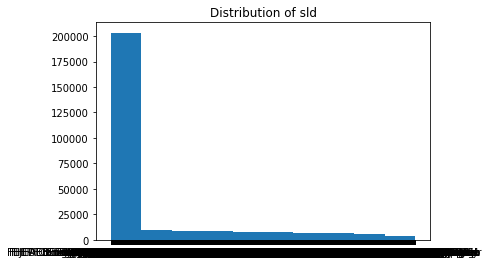

len


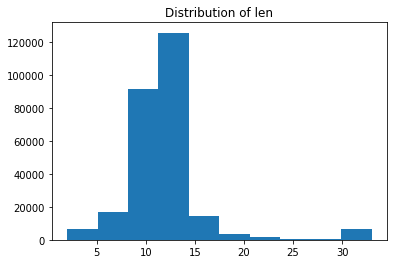

subdomain


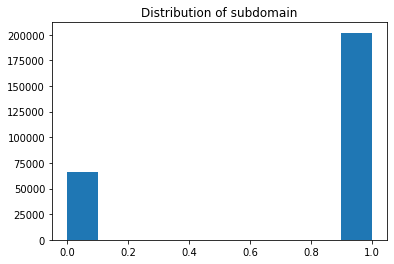

Target Attack


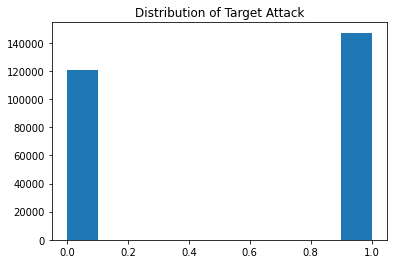

In [13]:
for feature in static_data.columns:
  print(feature)
  if feature == 'longest_word' or feature== 'sld' :
    plt.hist(static_data[feature].astype(str))
  else:
    plt.hist(static_data[feature])
  plt.title('Distribution of %s' %(feature))
  plt.show()

### Check data imbalance

In [14]:
target_attack = (static_data['Target Attack']).value_counts().reset_index()
target_attack

,index,Target Attack
0,1,147179
1,0,120895


<AxesSubplot:xlabel='Target Attack', ylabel='count'>

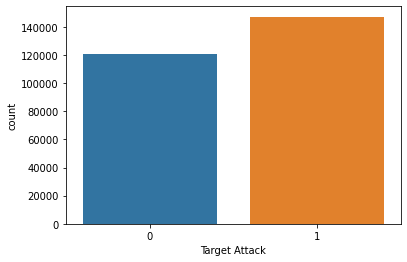

In [15]:
sns.countplot(x= 'Target Attack',data = static_data)

The data is blanced as the 2 number of samples in both classes are nearly equal and even the class we are intersted in (1) has more samples

In [16]:
static_data.skew()

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_33316\230459128.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  static_data.skew()


FQDN_count         -1.101731
subdomain_length   -0.590480
upper               5.988737
lower               0.343449
numeric            -0.594384
entropy            -0.140156
special            -0.902972
labels             -0.903680
labels_max          3.979910
labels_average      5.087081
len                 2.634801
subdomain          -1.176397
Target Attack      -0.197046
dtype: float64

## Feature engineering and data cleaning




### Missing or Categorical values

checking null values

In [17]:
static_data.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

Dropping null values

In [18]:
static_data_clean=static_data.dropna()
static_data_clean

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268069,33:51.5,18,3,0,16,0,2.338623,2,3,10,5.333333,alma,almaalomah,14,1,0
268070,36:02.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,0
268071,37:21.5,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
268072,24:25.1,16,0,0,14,0,3.249687,2,2,13,7.500000,radio,radio-vintage,14,0,0


checking after dropping null values

In [19]:
static_data_clean.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        0
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

### Transforming strings

using hashing

In [20]:
time_stamps=[]
for time_stamp in static_data_clean['timestamp']:
   time_stamps.append(hash(time_stamp))

In [21]:
longest_words=[]
for longest_word in static_data_clean['longest_word']:
   longest_words.append(hash(longest_word))

In [22]:
slds=[]
for sld in static_data_clean['sld']:
   slds.append(hash(sld))

In [23]:
static_data_modified = static_data_clean.copy(deep=True)

In [24]:
static_data_modified['timestamp']=time_stamps
static_data_modified['longest_word']=longest_words
static_data_modified['sld']=slds

In [25]:
static_data_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268066 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268066 non-null  int64  
 1   FQDN_count        268066 non-null  int64  
 2   subdomain_length  268066 non-null  int64  
 3   upper             268066 non-null  int64  
 4   lower             268066 non-null  int64  
 5   numeric           268066 non-null  int64  
 6   entropy           268066 non-null  float64
 7   special           268066 non-null  int64  
 8   labels            268066 non-null  int64  
 9   labels_max        268066 non-null  int64  
 10  labels_average    268066 non-null  float64
 11  longest_word      268066 non-null  int64  
 12  sld               268066 non-null  int64  
 13  len               268066 non-null  int64  
 14  subdomain         268066 non-null  int64  
 15  Target Attack     268066 non-null  int64  
dtypes: float64(2), int64

<AxesSubplot:>

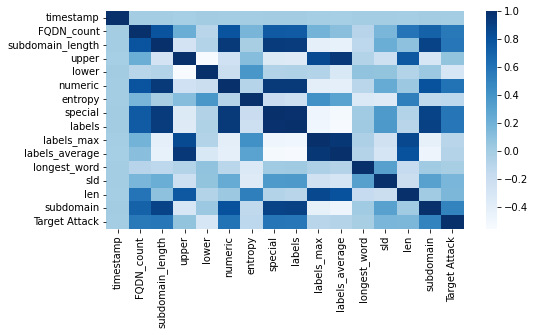

In [90]:
plt.figure(figsize=(8,4))
sns.heatmap(static_data_modified.corr(),cmap='Blues',annot=False)

It can observed that timestamp has no correlation with any other feature so dropping it will not affect our process

In [91]:
static_data_modified.describe()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
count,2.680660e+05,268066.000000,268066.000000,268066.000000,268066.000000,268066.000000,268066.000000,268066.000000,268066.000000,268066.000000,268066.000000,2.680660e+05,2.680660e+05,268066.000000,268066.000000,268066.00000
mean,6.919089e+15,22.286948,6.059179,0.845445,10.410048,6.497780,2.485749,4.533675,4.788899,8.252315,4.802258,-2.094831e+17,1.288974e+18,12.576873,0.753512,0.54904
std,5.309945e+18,6.000943,3.899449,4.942000,3.207761,4.499793,0.407707,2.187641,1.803228,4.415395,4.573132,3.522628e+18,3.480143e+18,4.177785,0.430967,0.49759
min,-9.223008e+18,2.000000,0.000000,0.000000,0.000000,0.000000,0.219195,0.000000,1.000000,2.000000,2.000000,-9.222078e+18,-9.221347e+18,2.000000,0.000000,0.00000
25%,-4.562799e+18,18.000000,3.000000,0.000000,10.000000,0.000000,2.054029,2.000000,3.000000,7.000000,3.166667,-2.055494e+18,6.984601e+17,11.000000,1.000000,0.00000
50%,4.475162e+16,24.000000,7.000000,0.000000,10.000000,8.000000,2.570417,6.000000,6.000000,7.000000,3.666667,-2.055494e+18,6.984601e+17,12.000000,1.000000,1.00000
75%,4.538822e+18,27.000000,10.000000,0.000000,10.000000,10.000000,2.767195,6.000000,6.000000,7.000000,4.000000,2.742907e+18,4.316238e+18,14.000000,1.000000,1.00000
max,9.222616e+18,36.000000,23.000000,32.000000,34.000000,12.000000,4.216847,7.000000,7.000000,32.000000,32.000000,9.218108e+18,9.221253e+18,33.000000,1.000000,1.00000


## Model training

In [26]:
y = np.array(static_data_modified['Target Attack'])
x = static_data_modified.drop(['Target Attack', 'timestamp'], axis=1)

### Data normalization

In [27]:
x_normalized = Normalizer().fit_transform(x)

### Models

In [28]:
global features_flag
features_flag = 0

global features_fn_hist

global features_fn_lgbm

Generating the confusion matrix average over the k folds

In [29]:
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix',model=None):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    if (not normalize) and features_flag and (model=='hist'):
      features_fn_hist.append(cnf_matrix[1][0])

    elif (not normalize) and features_flag and  (model=='lgbm'):
      features_fn_lgbm.append(cnf_matrix[1][0])

    return cnf_matrix

In [30]:
def plot_confusion_matrix(predicted_labels_list, y_test_list,model=None):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=['0','1'], title='Confusion matrix, without normalization',model=model)
    plt.show()

    # Plot normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=['0','1'], normalize=True, title='Normalized confusion matrix')
    plt.show()

Getting the average classfication report over k folds

In [31]:
def report_average(*args):
    report_list = list()
    for report in args:
        splited = [' '.join(x.split()) for x in report.split('\n\n')]
        header = [x for x in splited[0].split(' ')]
        data = np.array(splited[1].split(' ')).reshape(-1, len(header) + 1)
        data = np.delete(data, 0, 1).astype(float)
        rest = splited[2].split(' ')
        accuarcy =np.array([0, 0, rest[1], rest[2]]).astype(float).reshape(-1, len(header))
        macro_avg = np.array([rest[5:9]]).astype(float).reshape(-1, len(header))
        weighted_avg = np.array([rest[11:]]).astype(float).reshape(-1, len(header))
        #avg_total = np.array([x for x in avg]).astype(float).reshape(-1, len(header))
        df = pd.DataFrame(np.concatenate((data, accuarcy,macro_avg,weighted_avg)), columns=header)
        report_list.append(df)
    res = reduce(lambda x, y: x.add(y, fill_value=0), report_list) / len(report_list)
    return res.rename(index={res.index[-3]: 'accuracy',res.index[-2]: 'macro_avg',res.index[-1]: 'weighted_avg'})

In [32]:
def cr_avg(cr,model_name):
  report_avg  = report_average(cr[0],cr[1],cr[2],cr[3],cr[4])
  print(model_name)
  print(report_avg)

Number of folds to be ussed

In [33]:
global k_folds 
k_folds = 5

Trying differant models and getting their classfication reports

In [34]:
def models_results(x_train,y_train,x_test,y_test,model):
  y_predict =model.fit(x_train, y_train).predict(x_test)
  return classification_report(y_test, y_predict, target_names=['0', '1']), y_predict

In [35]:
def models(x_train,y_train,x_test,y_test):
  
  if k==1: 
    # varibales to store important values over all the folds to get average classfication report and average confusion matrix
    global gnb_cr, gnb_true, gnb_pred, gnb_pre, gnb_recall, gnb_f1
    gnb_cr =[]
    gnb_pre =[]
    gnb_recall =[]
    gnb_f1 =[]
    gnb_true =np.array([])
    gnb_pred =np.array([])

    global lr_cr, lr_true, lr_pred, lr_pre, lr_recall, lr_f1  
    lr_cr =[]
    lr_pre =[]
    lr_recall =[]
    lr_f1 =[]
    lr_true =np.array([])
    lr_pred =np.array([])

    global rf_cr, rf_true, rf_pred, rf_pre, rf_recall, rf_f1  
    rf_cr =[]
    rf_pre =[]
    rf_recall =[]
    rf_f1 =[]
    rf_true =np.array([])
    rf_pred =np.array([])

    global hg_cr, hg_true, hg_pred, hg_pre, hg_recall, hg_f1  
    hg_cr =[]
    hg_pre =[]
    hg_recall =[]
    hg_f1 =[]
    hg_true =np.array([])
    hg_pred =np.array([])

    global dt_cr, dt_true, dt_pred, dt_pre, dt_recall, dt_f1  
    dt_cr =[]
    dt_pre =[]
    dt_recall =[]
    dt_f1 =[]
    dt_true =np.array([])
    dt_pred =np.array([])

    global lgbm_cr, lgbm_true, lgbm_pred, lgbm_pre, lgbm_recall, lgbm_f1  
    lgbm_cr =[]
    lgbm_pre =[]
    lgbm_recall =[]
    lgbm_f1 =[]
    lgbm_true =np.array([])
    lgbm_pred =np.array([])



  # Naive bayes
  gnb = GaussianNB()
  cr, y_pred = models_results(x_train,y_train,x_test,y_test,gnb)
  gnb_cr.append(cr)
  gnb_pred=np.append(gnb_pred,y_pred)
  gnb_true=np.append(gnb_true,y_test)
  prf_gnb = precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1)
  gnb_pre.append(prf_gnb[0])
  gnb_recall.append(prf_gnb[1])
  gnb_f1.append(prf_gnb[2])

  if k==k_folds:
    cr_avg(gnb_cr,"\nNaive Bayes" )
    plot_confusion_matrix(gnb_pred, gnb_true)

  #logistic regression 
  lr=LogisticRegression(random_state=7)
  cr, y_pred = models_results(x_train,y_train,x_test,y_test,lr)
  lr_cr.append(cr)
  lr_pred=np.append(lr_pred,y_pred)
  lr_true=np.append(lr_true,y_test)
  prf_lr = precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1)
  lr_pre.append(prf_lr[0])
  lr_recall.append(prf_lr[1])
  lr_f1.append(prf_lr[2])
  if k==k_folds:
    cr_avg(lr_cr,"\nLogistic Regression")
    plot_confusion_matrix(lr_pred, lr_true)

  # Random forest
  rf=RandomForestClassifier(random_state=7)
  cr, y_pred = models_results(x_train,y_train,x_test,y_test,rf)
  rf_cr.append(cr)
  rf_pred=np.append(rf_pred,y_pred)
  rf_true=np.append(rf_true,y_test)
  prf_rf = precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1)
  rf_pre.append(prf_rf[0])
  rf_recall.append(prf_rf[1])
  rf_f1.append(prf_rf[2])
  if k==k_folds:
    cr_avg(rf_cr,"\nRandom Forest")
    plot_confusion_matrix(rf_pred, rf_true)

  # Hist gradient
  hg =  HistGradientBoostingClassifier(random_state=7)
  cr, y_pred = models_results(x_train,y_train,x_test,y_test,hg)
  hg_cr.append(cr)
  hg_pred=np.append(hg_pred,y_pred)
  hg_true=np.append(hg_true,y_test)
  prf_hg = precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1)
  hg_pre.append(prf_hg[0])
  hg_recall.append(prf_hg[1])
  hg_f1.append(prf_hg[2])
  if k==k_folds:
    cr_avg(hg_cr,"\nHist Gradient")
    plot_confusion_matrix(hg_pred, hg_true)

  #Decision Tree
  dt = DecisionTreeClassifier(random_state=7)
  cr, y_pred = models_results(x_train,y_train,x_test,y_test,dt)
  dt_cr.append(cr)
  dt_pred=np.append(dt_pred,y_pred)
  dt_true=np.append(dt_true,y_test)
  prf_dt = precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1)
  dt_pre.append(prf_dt[0])
  dt_recall.append(prf_dt[1])
  dt_f1.append(prf_dt[2])
  if k==k_folds:
    cr_avg(dt_cr,"\nDecision Tree")
    plot_confusion_matrix(dt_pred, dt_true)

  #LightGBM
  lgbm = LGBMClassifier(random_state=7)
  cr, y_pred = models_results(x_train,y_train,x_test,y_test,lgbm)
  lgbm_cr.append(cr)
  lgbm_pred= np.append(lgbm_pred,y_pred)
  lgbm_true=np.append(lgbm_true,y_test)
  prf_lgbm = precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1)
  lgbm_pre.append(prf_lgbm[0])
  lgbm_recall.append(prf_lgbm[1])
  lgbm_f1.append(prf_lgbm[2])
  if k==k_folds:
    cr_avg(lgbm_cr,"\nLightBGM")
    plot_confusion_matrix(lgbm_pred, lgbm_true)


### Data split

In [36]:
def model_train_test(x,y,chosen_model):
  skf = StratifiedKFold(n_splits=k_folds,random_state=7, shuffle=True)
  skf.get_n_splits(x)

  print(skf)

  global k
  k=0

  for train_index, test_index in skf.split(x,y):
      k+=1
      print(k)
      print("TRAIN:", train_index, "TEST:", test_index)
      x_train, x_test = x[train_index], x[test_index]
      y_train, y_test = y[train_index], y[test_index]
      if chosen_model == 0:
        models(x_train,y_train,x_test,y_test)
      else:
        chosen_models(x_train,y_train,x_test,y_test)

### Training and testing the models 

In [37]:
def plot_all_models():
  folds_no = [n+1 for n in range(k_folds)]
  # prescision plot
  plt.plot(folds_no,gnb_pre,linewidth=3.0,label='Naive Bayes')
  plt.plot(folds_no,lr_pre,linewidth=3.0, label='Logistic Regression')
  plt.plot(folds_no,rf_pre,linewidth=4.0, label='Random Forest')
  plt.plot(folds_no,hg_pre,'s', label='Histogram Gradient')
  plt.plot(folds_no,dt_pre,'--',linewidth=5.0, label='Decision Tree')
  plt.plot(folds_no,lgbm_pre,linewidth=3.0, label='LightGBM')
  plt.xlabel("Number of fold")
  plt.ylabel("Precision")
  plt.title("Precision over folds for Class 1")
  plt.legend(loc= 'upper right')
  plt.grid(b=True)
  plt.show()
  # Recall plot
  plt.plot(folds_no,gnb_recall,linewidth=3.0,label='Naive Bayes')
  plt.plot(folds_no,lr_recall,linewidth=3.0, label='Logistic Regression')
  plt.plot(folds_no,rf_recall,linewidth=4.0, label='Random Forest')
  plt.plot(folds_no,hg_recall,'s', label='Histogram Gradient')
  plt.plot(folds_no,dt_recall,'--',linewidth=5.0, label='Decision Tree')
  plt.plot(folds_no,lgbm_recall,linewidth=3.0, label='LightGBM')
  plt.xlabel("Number of fold")
  plt.ylabel("Recall")
  plt.title("Recall over folds for Class 1")
  plt.legend(loc= 'upper right')
  plt.grid(b=True)
  plt.show()
  # F1 sscore plot
  plt.plot(folds_no,gnb_f1,linewidth=3.0,label='Naive Bayes')
  plt.plot(folds_no,lr_f1,linewidth=3.0, label='Logistic Regression')
  plt.plot(folds_no,rf_f1,linewidth=4.0, label='Random Forest')
  plt.plot(folds_no,hg_f1,'s', label='Histogram Gradient')
  plt.plot(folds_no,dt_f1,'--',linewidth=5.0, label='Decision Tree')
  plt.plot(folds_no,lgbm_f1,linewidth=3.0, label='LightGBM')
  plt.xlabel("Number of fold")
  plt.ylabel("F1 score")
  plt.title("F1 score over folds for Class 1")
  plt.legend(loc= 'upper right')
  plt.grid(b=True)
  plt.show()

StratifiedKFold(n_splits=5, random_state=7, shuffle=True)
1
TRAIN: [     0      2      3 ... 268061 268063 268065] TEST: [     1      9     18 ... 268059 268062 268064]
2
TRAIN: [     0      1      3 ... 268062 268064 268065] TEST: [     2     11     16 ... 268054 268055 268063]
3
TRAIN: [     0      1      2 ... 268062 268063 268064] TEST: [     5     13     23 ... 268057 268061 268065]
4
TRAIN: [     1      2      3 ... 268063 268064 268065] TEST: [     0      4      8 ... 268042 268051 268052]
5
TRAIN: [     0      1      2 ... 268063 268064 268065] TEST: [     3      6      7 ... 268056 268058 268060]

Naive Bayes
              precision  recall  f1-score  support
0                 0.828   0.342     0.482  24177.4
1                 0.634   0.940     0.760  29435.8
accuracy          0.000   0.000     0.670  53613.2
macro_avg         0.730   0.640     0.620  53613.2
weighted_avg      0.720   0.670     0.634  53613.2
Confusion matrix, without normalization


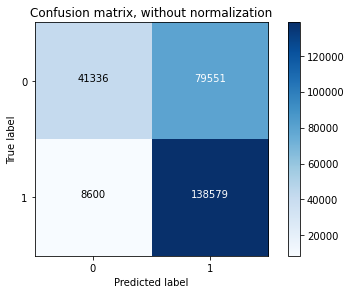

Normalized confusion matrix


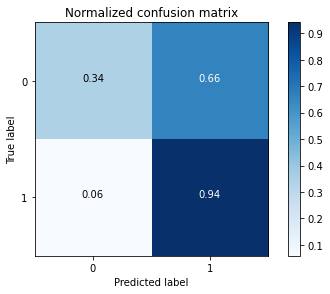


Logistic Regression
              precision  recall  f1-score  support
0                 0.850   0.422     0.566  24177.4
1                 0.664   0.940     0.780  29435.8
accuracy          0.000   0.000     0.708  53613.2
macro_avg         0.760   0.680     0.670  53613.2
weighted_avg      0.750   0.708     0.680  53613.2
Confusion matrix, without normalization


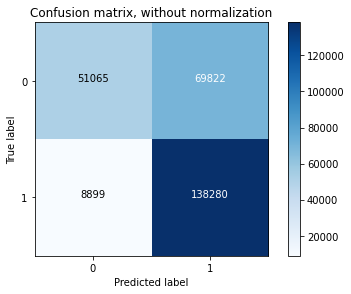

Normalized confusion matrix


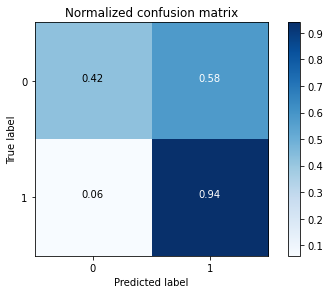


Random Forest
              precision  recall  f1-score  support
0                  0.98   0.618     0.760  24177.4
1                  0.76   0.990     0.860  29435.8
accuracy           0.00   0.000     0.820  53613.2
macro_avg          0.87   0.804     0.810  53613.2
weighted_avg       0.86   0.820     0.814  53613.2
Confusion matrix, without normalization


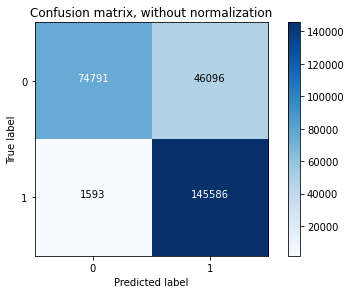

Normalized confusion matrix


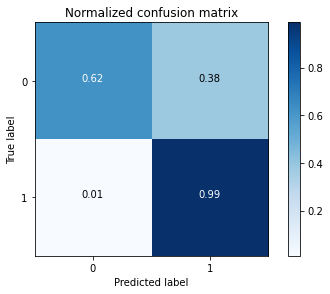


Hist Gradient
              precision  recall  f1-score  support
0                  1.00   0.614     0.760  24177.4
1                  0.76   1.000     0.860  29435.8
accuracy           0.00   0.000     0.826  53613.2
macro_avg          0.88   0.810     0.810  53613.2
weighted_avg       0.87   0.826     0.820  53613.2
Confusion matrix, without normalization


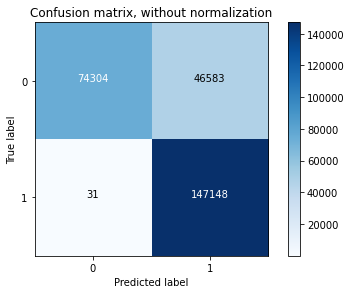

Normalized confusion matrix


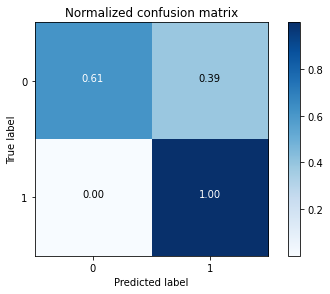


Decision Tree
              precision  recall  f1-score  support
0                  0.98   0.618     0.760  24177.4
1                  0.76   0.990     0.860  29435.8
accuracy           0.00   0.000     0.820  53613.2
macro_avg          0.87   0.804     0.810  53613.2
weighted_avg       0.86   0.820     0.814  53613.2
Confusion matrix, without normalization


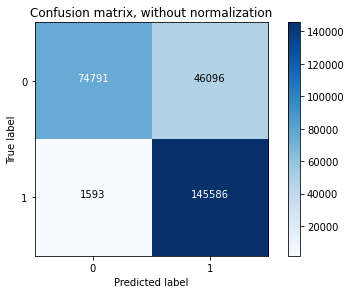

Normalized confusion matrix


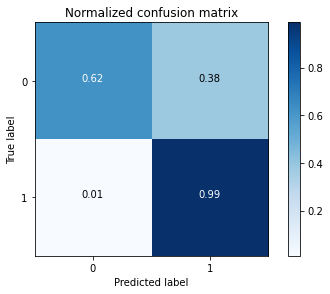


LightBGM
              precision  recall  f1-score  support
0                  1.00   0.614     0.760  24177.4
1                  0.76   1.000     0.860  29435.8
accuracy           0.00   0.000     0.826  53613.2
macro_avg          0.88   0.810     0.810  53613.2
weighted_avg       0.87   0.826     0.820  53613.2
Confusion matrix, without normalization


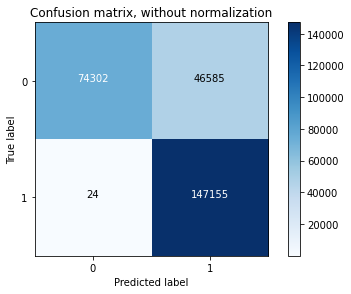

Normalized confusion matrix


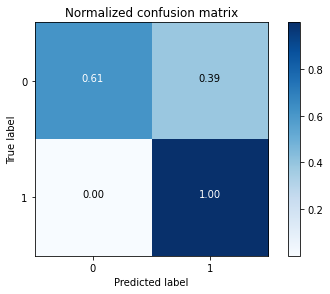

In [38]:
model_train_test(x_normalized,y,0)

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_33316\1534405372.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


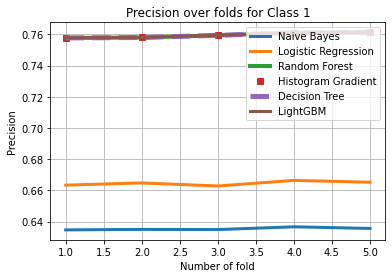

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_33316\1534405372.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


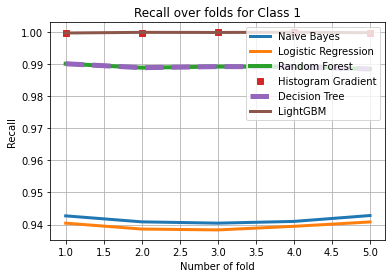

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_33316\1534405372.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


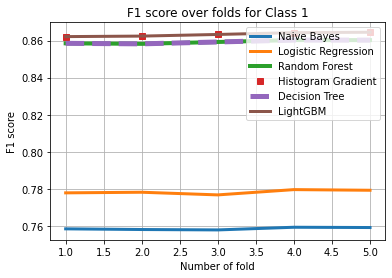

In [39]:
plot_all_models()

## Feature engineering and data cleaning


### Various data encoding for categorical values 

In [40]:
x_cat = static_data_clean.drop(['Target Attack', 'timestamp'], axis=1)

ordinal encoder

In [41]:
x_oe = x_cat.copy(deep=True)
enc = OrdinalEncoder()
x_oe[['longest_word','sld']] = enc.fit_transform(x_cat[['longest_word','sld']])
x_oe_normalized = Normalizer().fit_transform(x_oe)

StratifiedKFold(n_splits=5, random_state=7, shuffle=True)
1
TRAIN: [     0      2      3 ... 268061 268063 268065] TEST: [     1      9     18 ... 268059 268062 268064]


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2
TRAIN: [     0      1      3 ... 268062 268064 268065] TEST: [     2     11     16 ... 268054 268055 268063]


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3
TRAIN: [     0      1      2 ... 268062 268063 268064] TEST: [     5     13     23 ... 268057 268061 268065]


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4
TRAIN: [     1      2      3 ... 268063 268064 268065] TEST: [     0      4      8 ... 268042 268051 268052]


C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5
TRAIN: [     0      1      2 ... 268063 268064 268065] TEST: [     3      6      7 ... 268056 268058 268060]

Naive Bayes
              precision  recall  f1-score  support
0                 0.890   0.638     0.744  24177.4
1                 0.760   0.936     0.840  29435.8
accuracy          0.000   0.000     0.800  53613.2
macro_avg         0.824   0.790     0.790  53613.2
weighted_avg      0.820   0.800     0.796  53613.2
Confusion matrix, without normalization


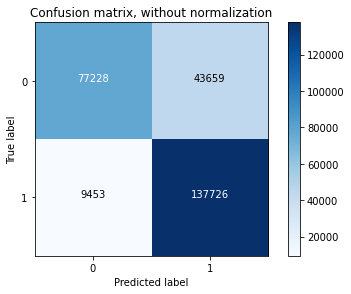

Normalized confusion matrix


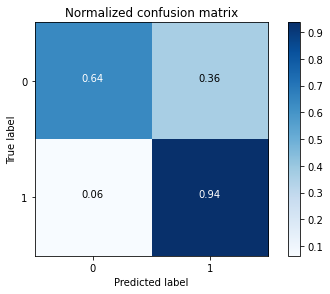

C:\Users\Mennatallah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
              precision  recall  f1-score  support
0                 0.954   0.624     0.754  24177.4
1                 0.760   0.980     0.852  29435.8
accuracy          0.000   0.000     0.820  53613.2
macro_avg         0.860   0.800     0.804  53613.2
weighted_avg      0.850   0.820     0.810  53613.2
Confusion matrix, without normalization


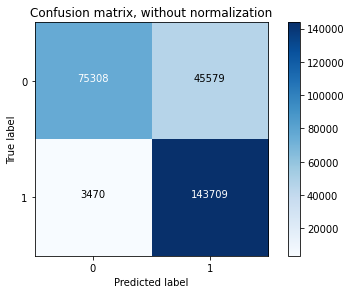

Normalized confusion matrix


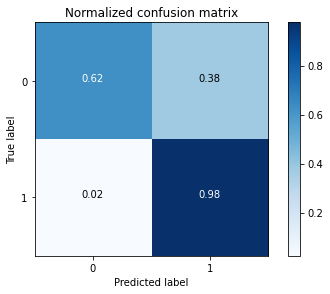


Random Forest
              precision  recall  f1-score  support
0                  1.00   0.614     0.760  24177.4
1                  0.76   1.000     0.860  29435.8
accuracy           0.00   0.000     0.826  53613.2
macro_avg          0.88   0.810     0.810  53613.2
weighted_avg       0.87   0.826     0.820  53613.2
Confusion matrix, without normalization


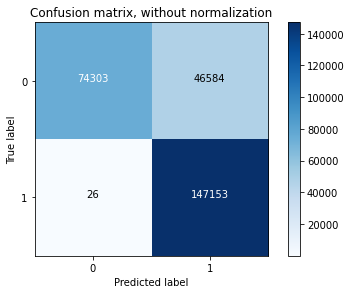

Normalized confusion matrix


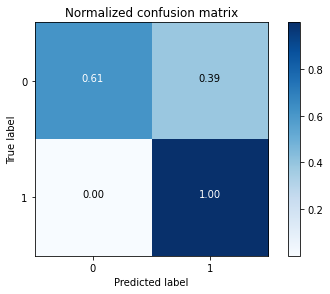


Hist Gradient
              precision  recall  f1-score  support
0                  1.00   0.614     0.760  24177.4
1                  0.76   1.000     0.860  29435.8
accuracy           0.00   0.000     0.826  53613.2
macro_avg          0.88   0.810     0.810  53613.2
weighted_avg       0.87   0.826     0.820  53613.2
Confusion matrix, without normalization


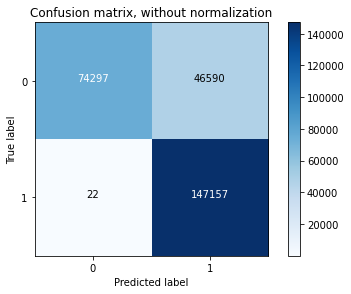

Normalized confusion matrix


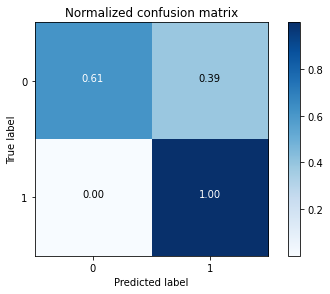


Decision Tree
              precision  recall  f1-score  support
0                  1.00   0.614     0.760  24177.4
1                  0.76   1.000     0.860  29435.8
accuracy           0.00   0.000     0.826  53613.2
macro_avg          0.88   0.810     0.810  53613.2
weighted_avg       0.87   0.826     0.820  53613.2
Confusion matrix, without normalization


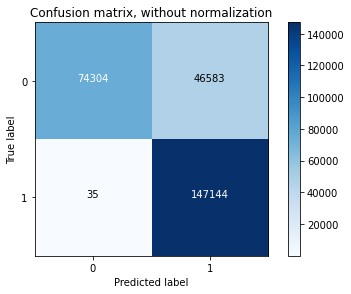

Normalized confusion matrix


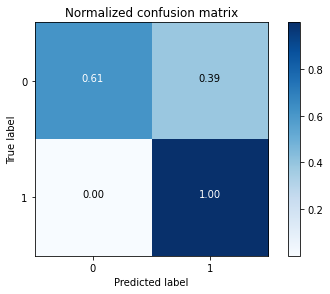


LightBGM
              precision  recall  f1-score  support
0                  1.00   0.614     0.760  24177.4
1                  0.76   1.000     0.860  29435.8
accuracy           0.00   0.000     0.826  53613.2
macro_avg          0.88   0.810     0.810  53613.2
weighted_avg       0.87   0.826     0.820  53613.2
Confusion matrix, without normalization


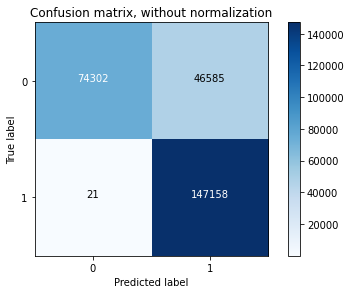

Normalized confusion matrix


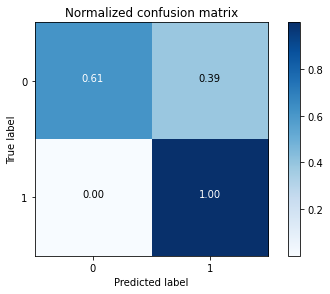

In [42]:
model_train_test(x_oe_normalized,y,0)

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_33316\1534405372.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


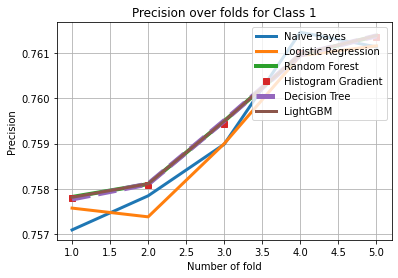

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_33316\1534405372.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


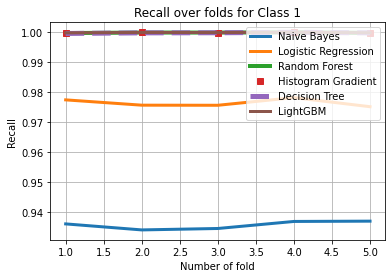

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_33316\1534405372.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


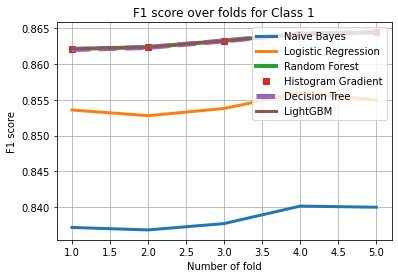

In [43]:
plot_all_models()

Count encoder

In [44]:
x_count = x_cat.copy(deep=True)
ce = CountEncoder()
x_count[['longest_word','sld']] = ce.fit_transform(x_cat[['longest_word','sld']])
x_count_normalized = Normalizer().fit_transform(x_count)

StratifiedKFold(n_splits=5, random_state=7, shuffle=True)
1
TRAIN: [     0      2      3 ... 268061 268063 268065] TEST: [     1      9     18 ... 268059 268062 268064]
2
TRAIN: [     0      1      3 ... 268062 268064 268065] TEST: [     2     11     16 ... 268054 268055 268063]
3
TRAIN: [     0      1      2 ... 268062 268063 268064] TEST: [     5     13     23 ... 268057 268061 268065]
4
TRAIN: [     1      2      3 ... 268063 268064 268065] TEST: [     0      4      8 ... 268042 268051 268052]
5
TRAIN: [     0      1      2 ... 268063 268064 268065] TEST: [     3      6      7 ... 268056 268058 268060]

Naive Bayes
              precision  recall  f1-score  support
0                 0.976   0.622     0.756  24177.4
1                 0.760   0.988     0.860  29435.8
accuracy          0.000   0.000     0.820  53613.2
macro_avg         0.868   0.802     0.810  53613.2
weighted_avg      0.858   0.820     0.812  53613.2
Confusion matrix, without normalization


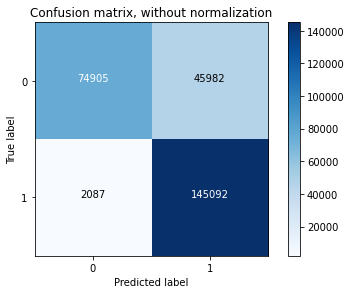

Normalized confusion matrix


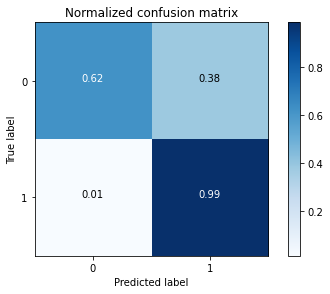


Logistic Regression
              precision  recall  f1-score  support
0                 0.990   0.616     0.760  24177.4
1                 0.760   0.992     0.860  29435.8
accuracy          0.000   0.000     0.824  53613.2
macro_avg         0.872   0.806     0.810  53613.2
weighted_avg      0.860   0.824     0.816  53613.2
Confusion matrix, without normalization


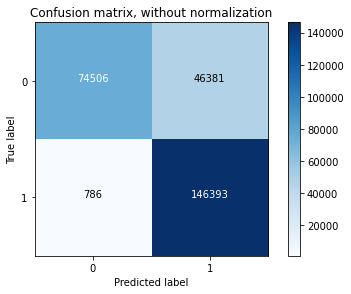

Normalized confusion matrix


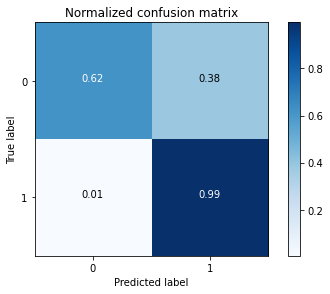


Random Forest
              precision  recall  f1-score  support
0                  1.00   0.614     0.760  24177.4
1                  0.76   1.000     0.860  29435.8
accuracy           0.00   0.000     0.826  53613.2
macro_avg          0.88   0.810     0.810  53613.2
weighted_avg       0.87   0.826     0.820  53613.2
Confusion matrix, without normalization


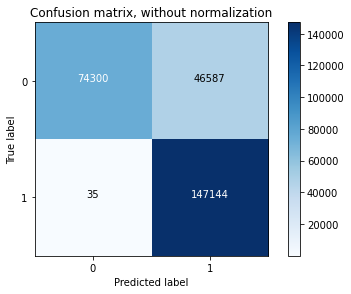

Normalized confusion matrix


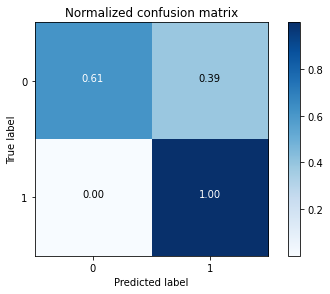


Hist Gradient
              precision  recall  f1-score  support
0                  1.00   0.614     0.760  24177.4
1                  0.76   1.000     0.860  29435.8
accuracy           0.00   0.000     0.826  53613.2
macro_avg          0.88   0.810     0.810  53613.2
weighted_avg       0.87   0.826     0.820  53613.2
Confusion matrix, without normalization


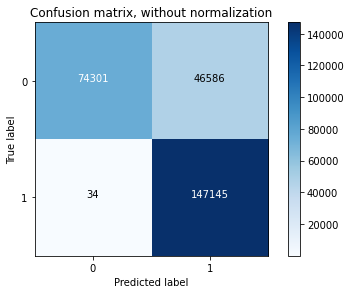

Normalized confusion matrix


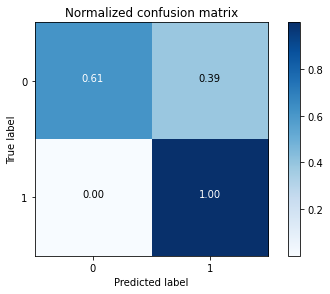


Decision Tree
              precision  recall  f1-score  support
0                  1.00   0.614     0.760  24177.4
1                  0.76   1.000     0.860  29435.8
accuracy           0.00   0.000     0.826  53613.2
macro_avg          0.88   0.810     0.810  53613.2
weighted_avg       0.87   0.826     0.820  53613.2
Confusion matrix, without normalization


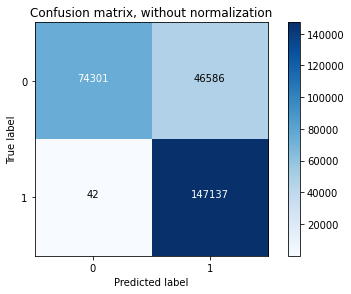

Normalized confusion matrix


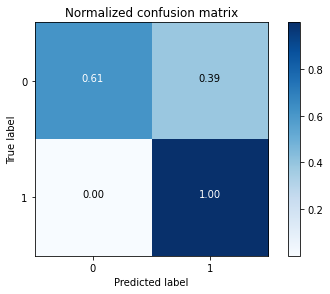


LightBGM
              precision  recall  f1-score  support
0                  1.00   0.614     0.760  24177.4
1                  0.76   1.000     0.860  29435.8
accuracy           0.00   0.000     0.826  53613.2
macro_avg          0.88   0.810     0.810  53613.2
weighted_avg       0.87   0.826     0.820  53613.2
Confusion matrix, without normalization


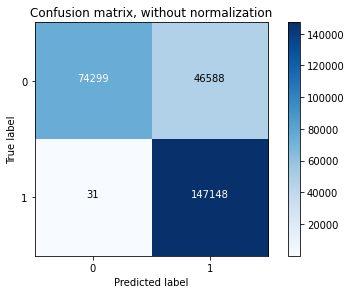

Normalized confusion matrix


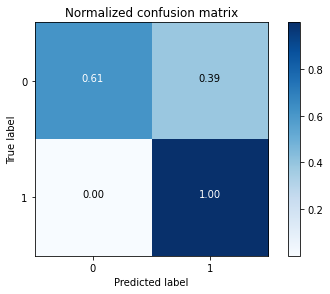

In [45]:
model_train_test(x_count_normalized,y,0)

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_33316\1534405372.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


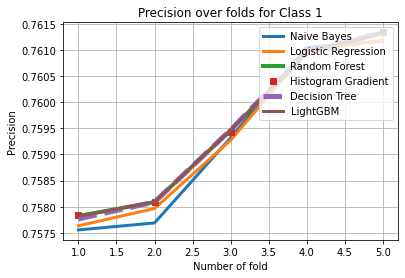

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_33316\1534405372.py:27: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


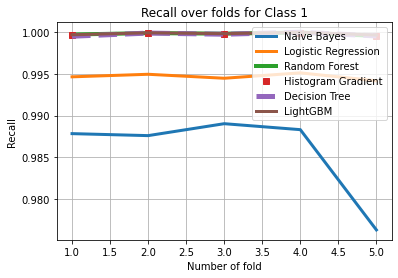

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_33316\1534405372.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


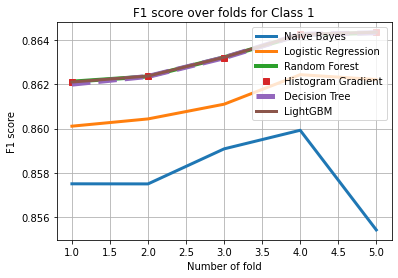

In [46]:
plot_all_models()

## Feature filtering / selection 

In [47]:
def chosen_models_tunning(x_train,y_train,x_test,y_test):
  
  # Hist gradient
  hg =  HistGradientBoostingClassifier(random_state=7)
  cr, y_pred = models_results(x_train,y_train,x_test,y_test,hg)
  prf_hg = precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1)
  hg_pres_tune.append(prf_hg[0])
  hg_recall_tune.append(prf_hg[1])
  hg_f1_tune.append(prf_hg[2])

  #LightGBM
  lgbm = LGBMClassifier(random_state=7)
  cr, y_pred = models_results(x_train,y_train,x_test,y_test,lgbm)
  prf_lgbm = precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1)
  lgbm_pres_tune.append(prf_lgbm[0])
  lgbm_recall_tune.append(prf_lgbm[1])
  lgbm_f1_tune.append(prf_lgbm[2])


In [48]:
x_oe_norm = Normalizer().fit_transform(x_oe)
x_ftrain,x_ftest,y_ftrain,y_ftest=train_test_split(x_oe_norm,y,test_size=0.15,random_state=7)
x_ftrain,x_fval,y_ftrain,y_fval=train_test_split(x_ftrain,y_ftrain,test_size=0.2,random_state=7)

In [49]:
no_features = np.shape(x_count.head())[1]
no_features

14

In [50]:
global hg_pres_tune
global hg_recall_tune
global hg_f1_tune
global lgbm_pres_tune
global lgbm_recall_tune
global lgbm_f1_tune


In [51]:
def plot_model_n_features(method_used):
  features_number=[x+1 for x in range(no_features)]
  # Precision plot
  plt.plot(features_number,hg_pres_tune,'--', linewidth=4.0, label='Histogram Gradient')
  plt.plot(features_number,lgbm_pres_tune,linewidth=3.0, label='LightGBM')
  plt.xlabel("Number of features")
  plt.ylabel("Precision")
  plt.title("Precision score for Class 1 Vs number of features using %s" %(method_used))
  plt.legend(loc= 'upper right')
  plt.grid(visible=True)
  plt.show()
  # Recall plot
  plt.plot(features_number,hg_recall_tune,'--', linewidth=4.0,label='Histogram Gradient')
  plt.plot(features_number,lgbm_recall_tune,linewidth=3.0, label='LightGBM')
  plt.xlabel("Number of features")
  plt.ylabel("Recall")
  plt.title("Recall score for Class 1 Vs number of features %s" %(method_used))
  plt.legend(loc= 'upper right')
  plt.grid(visible=True)
  plt.show()
  # F1 sscore plot
  plt.plot(features_number,hg_f1_tune,'--', linewidth=4.0, label='Histogram Gradient')
  plt.plot(features_number,lgbm_f1_tune,linewidth=3.0, label='LightGBM')
  plt.xlabel("Number of features")
  plt.ylabel("F1 score")
  plt.title("F1 score for Class 1 Vs number of features %s" %(method_used))
  plt.legend(loc= 'upper right')
  plt.grid(visible=True)
  plt.show()

In [52]:
# prints the best number of features
def best_n_features(method_used):
  print(method_used)
  print("Best number of features for hist_gradient according to precision", (np.argmax(hg_pres_tune)+1))
  print("Best number of features for hist_gradient according to recall", (np.argmax(hg_recall_tune)+1))
  print("Best number of features for hist_gradient according to F1-score", (np.argmax(hg_f1_tune)+1))
  print("Best number of features for LightGBM according to precision", (np.argmax(lgbm_pres_tune)+1))
  print("Best number of features for LightGBM according to recall", (np.argmax(lgbm_recall_tune)+1))
  print("Best number of features for LightGBM according to F1-score", (np.argmax(lgbm_f1_tune)+1))

### ANOVA

In [53]:
hg_pres_tune =[]
hg_recall_tune  =[]
hg_f1_tune =[]
lgbm_pres_tune =[]
lgbm_recall_tune =[]
lgbm_f1_tune =[]
for feature in range(no_features):
  anova_f =SelectKBest(f_classif, k=(feature+1))
  anova_f.fit_transform(x_fval,y_fval)
  x_anova_train = anova_f.transform(x_ftrain)
  x_anova_test = anova_f.transform(x_ftest)
  chosen_models_tunning(x_anova_train,y_ftrain,x_anova_test,y_ftest)

In [54]:
best_n_features("ANOVA")

ANOVA
Best number of features for hist_gradient according to precision 6
Best number of features for hist_gradient according to recall 5
Best number of features for hist_gradient according to F1-score 5
Best number of features for LightGBM according to precision 11
Best number of features for LightGBM according to recall 6
Best number of features for LightGBM according to F1-score 11


Plots

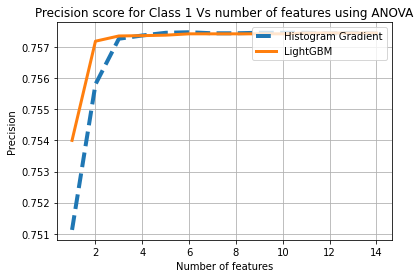

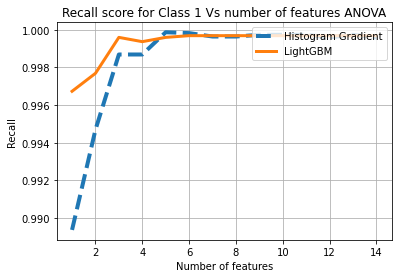

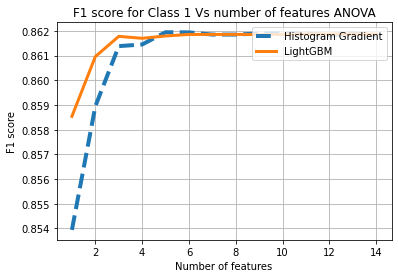

In [55]:
plot_model_n_features("ANOVA")

### Mutual information

In [56]:
hg_pres_tune =[]
hg_recall_tune  =[]
hg_f1_tune =[]
lgbm_pres_tune =[]
lgbm_recall_tune =[]
lgbm_f1_tune =[]
for feature in range(no_features):
  mutual_f =SelectKBest(partial(mutual_info_classif, random_state=7), k=(feature+1))
  mutual_f.fit_transform(x_fval,y_fval)
  x_mutual_train = mutual_f.transform(x_ftrain)
  x_mutual_test = mutual_f.transform(x_ftest)
  chosen_models_tunning(x_mutual_train,y_ftrain,x_mutual_test,y_ftest)

In [57]:
best_n_features("Mutual info")

Mutual info
Best number of features for hist_gradient according to precision 5
Best number of features for hist_gradient according to recall 3
Best number of features for hist_gradient according to F1-score 5
Best number of features for LightGBM according to precision 5
Best number of features for LightGBM according to recall 4
Best number of features for LightGBM according to F1-score 5


Plots

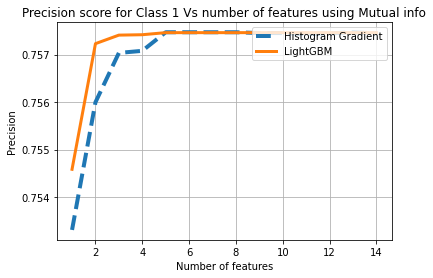

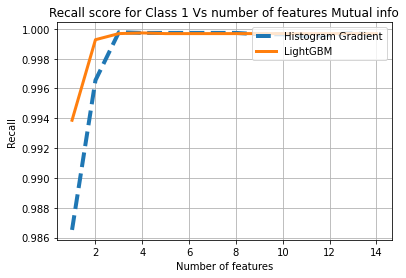

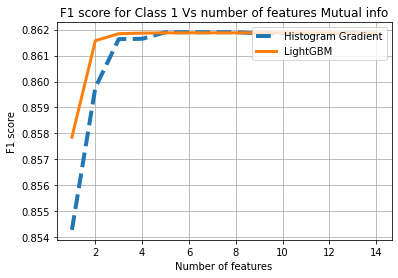

In [58]:
plot_model_n_features("Mutual info")

### Tree based selection

In [59]:
hg_pres_tune =[]
hg_recall_tune  =[]
hg_f1_tune =[]
lgbm_pres_tune =[]
lgbm_recall_tune =[]
lgbm_f1_tune =[]
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x_fval, y_fval)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
x_tree_train = model.transform(x_ftrain)
x_tree_test = model.transform(x_ftest)

In [60]:
chosen_models_tunning(x_tree_train,y_ftrain,x_tree_test,y_ftest)

In [61]:
np.shape(x_tree_test)

(40210, 5)

In [62]:
print(hg_pres_tune)
print(hg_recall_tune)
print(hg_f1_tune)
print(lgbm_pres_tune)
print(lgbm_recall_tune)
print(lgbm_f1_tune)

[0.7573952271083715]
[0.9990461049284579]
[0.8615975241900734]
[0.7573817881478423]
[0.9996820349761526]
[0.8618252305523467]


### PCA

In [63]:
hg_pres_tune =[]
hg_recall_tune  =[]
hg_f1_tune =[]
lgbm_pres_tune =[]
lgbm_recall_tune =[]
lgbm_f1_tune =[]
for feature in range(no_features):
  pca_f = PCA(n_components=feature+1)
  pca_f.fit_transform(x_fval,y_fval)
  x_pca_train = pca_f.transform(x_ftrain)
  x_pca_test = pca_f.transform(x_ftest)
  chosen_models_tunning(x_pca_train,y_ftrain,x_pca_test,y_ftest)

In [64]:
best_n_features("PCA")

PCA
Best number of features for hist_gradient according to precision 7
Best number of features for hist_gradient according to recall 4
Best number of features for hist_gradient according to F1-score 7
Best number of features for LightGBM according to precision 13
Best number of features for LightGBM according to recall 13
Best number of features for LightGBM according to F1-score 13


Plots

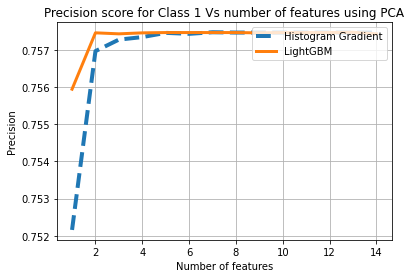

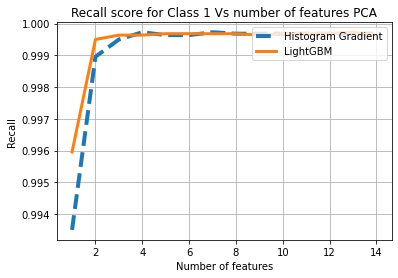

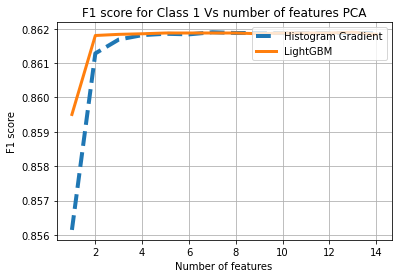

In [65]:
plot_model_n_features('PCA')

As observed the number of feature stops affecting the preformance of the models after a certain threshold so dropping the unnecessary features wil decrease both the time and the computational power needed for the model

Mutual info is chosen as it gives the most stable preformnace across all the metrices and 5 features are chosen as they give the best preformance in both Hist gradient and LightGBM


In [66]:
mutual_f_final =SelectKBest(mutual_info_classif, k=5)
mutual_f_final.fit(x_fval,y_fval)
x_filtered = mutual_f_final.transform(x_oe_norm)

## Tunning hyperparameters

In [67]:
x_htrain,x_htest,y_htrain,y_htest=train_test_split(x_filtered,y,test_size=0.2,random_state=7)

### Hist_gradient

In [68]:
hg_parameters = [{'learning_rate':[0.01,0.1,1],'min_samples_leaf':[5,10,20,40,50], 'max_iter':[50,100,200,500,1000]}]
hg_tune = HistGradientBoostingClassifier(random_state=7)
hg_grid = GridSearchCV(hg_tune,hg_parameters,scoring='f1')
hg_grid.fit(x_htrain,y_htrain)

GridSearchCV(estimator=HistGradientBoostingClassifier(random_state=7),
             param_grid=[{'learning_rate': [0.01, 0.1, 1],
                          'max_iter': [50, 100, 200, 500, 1000],
                          'min_samples_leaf': [5, 10, 20, 40, 50]}],
             scoring='f1')

In [69]:
hg_grid.cv_results_

{'mean_fit_time': array([ 0.95,  0.99,  1.05,  1.03,  1.01,  1.79,  1.76,  1.78,  1.82,
         1.77,  3.44,  3.37,  3.45,  3.45,  3.38,  8.12,  8.2 ,  8.19,
         8.07,  8.4 , 17.21, 16.88, 16.55, 16.37, 17.02,  1.01,  1.  ,
         0.98,  0.98,  1.  ,  1.84,  1.81,  1.83,  1.87,  1.81,  2.27,
         2.52,  2.43,  2.7 ,  2.55,  2.27,  2.65,  2.46,  2.65,  2.55,
         2.26,  2.67,  2.58,  2.82,  2.52,  0.33,  0.32,  0.33,  0.37,
         0.39,  0.37,  0.37,  0.37,  0.39,  0.45,  0.39,  0.35,  0.37,
         0.38,  0.4 ,  0.38,  0.34,  0.32,  0.37,  0.36,  0.33,  0.33,
         0.33,  0.39,  0.4 ]),
 'std_fit_time': array([0.02, 0.03, 0.03, 0.09, 0.05, 0.09, 0.03, 0.03, 0.07, 0.02, 0.1 ,
        0.05, 0.16, 0.11, 0.03, 0.08, 0.19, 0.14, 0.06, 0.3 , 1.72, 0.81,
        0.81, 1.18, 0.56, 0.03, 0.02, 0.01, 0.01, 0.04, 0.02, 0.01, 0.04,
        0.05, 0.01, 0.4 , 0.56, 0.32, 0.22, 0.33, 0.47, 0.88, 0.29, 0.31,
        0.33, 0.42, 0.88, 0.29, 0.22, 0.36, 0.02, 0.01, 0.02, 0.01, 0.04

In [70]:
hg_grid.best_params_

{'learning_rate': 0.1, 'max_iter': 200, 'min_samples_leaf': 10}

In [71]:
hg_grid.score(x_htest,y_htest)

0.8627232142857142

### LightGBM

In [72]:
lgbm_parameters = [{'learning_rate':[0.01,0.1,1],'min_child_samples':[5,10,20,40,50], 'n_estimators':[50,100,200,500,1000]}]
lgbm_tune = LGBMClassifier(random_state=7)
lgbm_grid = GridSearchCV(lgbm_tune,lgbm_parameters,scoring='f1')
lgbm_grid.fit(x_htrain,y_htrain)



GridSearchCV(estimator=LGBMClassifier(random_state=7),
             param_grid=[{'learning_rate': [0.01, 0.1, 1],
                          'min_child_samples': [5, 10, 20, 40, 50],
                          'n_estimators': [50, 100, 200, 500, 1000]}],
             scoring='f1')

In [73]:
lgbm_grid.cv_results_

{'mean_fit_time': array([0.31, 0.52, 1.  , 2.3 , 4.35, 0.3 , 0.51, 0.89, 2.6 , 4.7 , 0.34,
        0.52, 0.95, 2.64, 4.67, 0.35, 0.63, 1.16, 2.15, 4.22, 0.34, 0.55,
        0.95, 2.05, 4.02, 0.31, 0.51, 0.9 , 2.43, 4.71, 0.3 , 0.5 , 0.91,
        2.33, 4.95, 0.3 , 0.5 , 0.93, 2.41, 4.79, 0.33, 0.53, 0.98, 2.36,
        4.8 , 0.31, 0.55, 0.96, 2.48, 4.87, 0.35, 0.54, 0.91, 1.97, 3.98,
        0.34, 0.53, 1.02, 2.12, 3.73, 0.35, 0.53, 0.91, 1.93, 3.59, 0.34,
        0.54, 0.89, 1.96, 3.61, 0.37, 0.57, 0.88, 2.04, 3.94]),
 'std_fit_time': array([0.03, 0.04, 0.11, 0.26, 0.62, 0.01, 0.04, 0.11, 0.18, 0.43, 0.02,
        0.02, 0.03, 0.11, 0.4 , 0.04, 0.11, 0.12, 0.16, 0.22, 0.02, 0.04,
        0.06, 0.02, 0.08, 0.01, 0.03, 0.03, 0.12, 0.14, 0.01, 0.03, 0.02,
        0.06, 0.39, 0.01, 0.03, 0.02, 0.06, 0.12, 0.02, 0.03, 0.06, 0.03,
        0.11, 0.02, 0.06, 0.02, 0.11, 0.16, 0.03, 0.02, 0.06, 0.09, 0.15,
        0.02, 0.02, 0.09, 0.22, 0.04, 0.02, 0.02, 0.07, 0.14, 0.27, 0.01,
        0.04, 0

In [74]:
lgbm_grid.best_params_

{'learning_rate': 0.1, 'min_child_samples': 20, 'n_estimators': 200}

In [75]:
lgbm_grid.score(x_htest,y_htest)

0.8627773454134301

## Choosing the static model

In [82]:
def chosen_models(x_train,y_train,x_test,y_test):
  
  if k==1: 
    # varibales to store important values over all the folds to get average classfication report and average confusion matrix

    global hg_cr, hg_true, hg_pred, hg_pre, hg_recall, hg_f1  
    hg_cr =[]
    hg_pre =[]
    hg_recall =[]
    hg_f1 =[]
    hg_true =np.array([])
    hg_pred =np.array([])
    global lgbm_cr, lgbm_true, lgbm_pred, lgbm_pre, lgbm_recall, lgbm_f1,lgbm  
    lgbm_cr =[]
    lgbm_pre =[]
    lgbm_recall =[]
    lgbm_f1 =[]
    lgbm_true =np.array([])
    lgbm_pred =np.array([])



  # Hist gradient
  hg =  HistGradientBoostingClassifier(learning_rate=0.1, max_iter=200, min_samples_leaf= 10, random_state=7)
  cr, y_pred = models_results(x_train,y_train,x_test,y_test,hg)
  hg_cr.append(cr)
  hg_pred=np.append(hg_pred,y_pred)
  hg_true=np.append(hg_true,y_test)
  prf_hg = precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1)
  hg_pre.append(prf_hg[0])
  hg_recall.append(prf_hg[1])
  hg_f1.append(prf_hg[2])
  if k==k_folds:
    cr_avg(hg_cr,"\nHist Gradient")
    plot_confusion_matrix(hg_pred, hg_true,'hist')

 #LightGBM
  lgbm = LGBMClassifier(learning_rate=0.1, min_child_samples=20, n_estimators=200, random_state=7)
  cr, y_pred = models_results(x_train,y_train,x_test,y_test,lgbm)
  lgbm_cr.append(cr)
  lgbm_pred= np.append(lgbm_pred,y_pred)
  lgbm_true=np.append(lgbm_true,y_test)
  prf_lgbm = precision_recall_fscore_support(y_test, y_pred, average='binary',pos_label=1)
  lgbm_pre.append(prf_lgbm[0])
  lgbm_recall.append(prf_lgbm[1])
  lgbm_f1.append(prf_lgbm[2])
  if k==k_folds:
    cr_avg(lgbm_cr,"\nLightBGM")
    plot_confusion_matrix(lgbm_pred, lgbm_true, 'lgbm')


In [77]:
def plot_chosen_models():
  folds_no = [n+1 for n in range(k_folds)]
  # prescision plot
  plt.plot(folds_no,hg_pre,'--', linewidth=4.0, label='Histogram Gradient')
  plt.plot(folds_no,lgbm_pre,linewidth=3.0, label='LightGBM')
  plt.xlabel("Number of fold")
  plt.ylabel("Precision")
  plt.title("Precision over folds for Class 1")
  plt.legend(loc= 'upper right')
  plt.grid(b=True)
  plt.show()
  # Recall plot
  plt.plot(folds_no,hg_recall,'--', linewidth=4.0,label='Histogram Gradient')
  plt.plot(folds_no,lgbm_recall,linewidth=3.0, label='LightGBM')
  plt.xlabel("Number of fold")
  plt.ylabel("Recall")
  plt.title("Recall over folds for Class 1")
  plt.legend(loc= 'upper right')
  plt.grid(b=True)
  plt.show()
  # F1 sscore plot
  plt.plot(folds_no,hg_f1,'--', linewidth=4.0, label='Histogram Gradient')
  plt.plot(folds_no,lgbm_f1,linewidth=3.0, label='LightGBM')
  plt.xlabel("Number of fold")
  plt.ylabel("F1 score")
  plt.title("F1 score over folds for Class 1")
  plt.legend(loc= 'upper right')
  plt.grid(b=True)
  plt.show()

StratifiedKFold(n_splits=5, random_state=7, shuffle=True)
1
TRAIN: [     0      2      3 ... 268061 268063 268065] TEST: [     1      9     18 ... 268059 268062 268064]
2
TRAIN: [     0      1      3 ... 268062 268064 268065] TEST: [     2     11     16 ... 268054 268055 268063]
3
TRAIN: [     0      1      2 ... 268062 268063 268064] TEST: [     5     13     23 ... 268057 268061 268065]
4
TRAIN: [     1      2      3 ... 268063 268064 268065] TEST: [     0      4      8 ... 268042 268051 268052]
5
TRAIN: [     0      1      2 ... 268063 268064 268065] TEST: [     3      6      7 ... 268056 268058 268060]

Hist Gradient
              precision  recall  f1-score  support
0                  1.00   0.614     0.760  24177.4
1                  0.76   1.000     0.860  29435.8
accuracy           0.00   0.000     0.826  53613.2
macro_avg          0.88   0.810     0.810  53613.2
weighted_avg       0.87   0.826     0.820  53613.2
Confusion matrix, without normalization


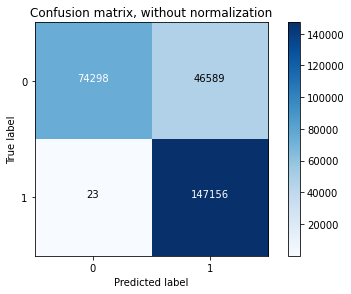

Normalized confusion matrix


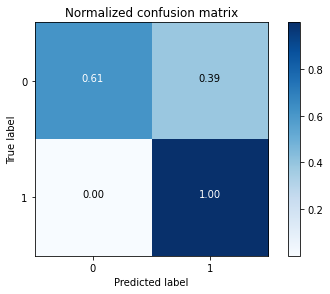


LightBGM
              precision  recall  f1-score  support
0                  1.00   0.614     0.760  24177.4
1                  0.76   1.000     0.860  29435.8
accuracy           0.00   0.000     0.826  53613.2
macro_avg          0.88   0.810     0.810  53613.2
weighted_avg       0.87   0.826     0.820  53613.2
Confusion matrix, without normalization


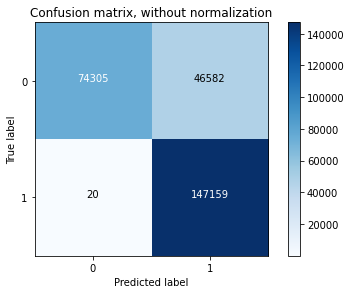

Normalized confusion matrix


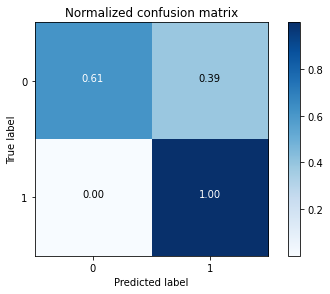

In [83]:
model_train_test(x_filtered,y,1)

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_33316\490434543.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


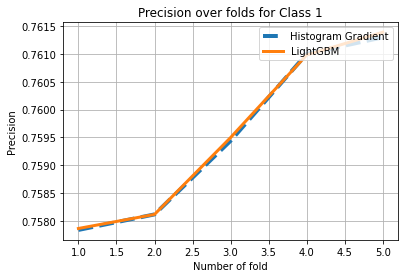

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_33316\490434543.py:19: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


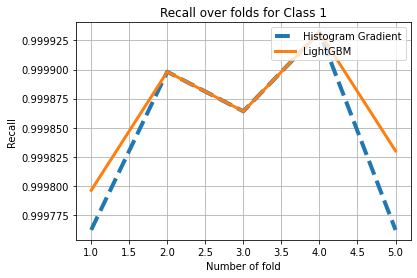

C:\Users\Mennatallah\AppData\Local\Temp\ipykernel_33316\490434543.py:28: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True)


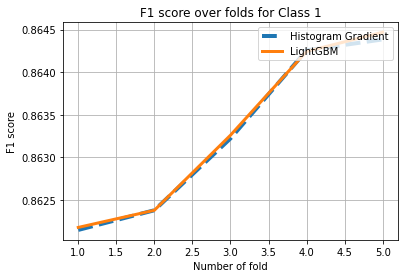

In [84]:
plot_chosen_models()

The chosen model is LightGBM eventhough they have very similar preformance , LightGBM has the lead and it is more clear in the number of false negatives

### Saving the model

In [85]:
#same used in dynamic model to ensure having consistent results
def preprocess_data(data):
  data_clean=data.dropna()
  y = data_clean['Target Attack']
  x = data_clean.drop(['Target Attack', 'timestamp'], axis=1)
  return x,y

In [86]:
static_pipe = Pipeline([('Encoder',OrdinalEncoder()), ('Normalization',Normalizer()),('Feature selction', SelectKBest(mutual_info_classif, k=5)),('model',lgbm)])

In [87]:
x_static, y_static = preprocess_data(static_data)
static_pipe.fit(x_static,y_static)

Pipeline(steps=[('Encoder',
                 OrdinalEncoder(cols=['longest_word', 'sld'],
                                mapping=[{'col': 'longest_word',
                                          'data_type': dtype('O'),
                                          'mapping': 2               1
local           2
pforzheim       3
4               4
face            5
             ... 
hands        6221
match        6222
pantheon     6223
sizer        6224
NaN            -2
Length: 6225, dtype: int64},
                                         {'col': 'sld', 'data_type': dtype('O'),
                                          'mapping': 192                     1
local                   2
pforzheim-bisons        3
224                     4
reface                  5
                    ...  
awwapp              11107
telia               11108
boomstream          11109
e2ma                11110
NaN                    -2
Length: 11111, dtype: int64}])),
                ('Normalization', Normalizer()),
                ('Feature selction',
                 SelectKBest(k=5,
                             score_func=<function mutual_info_classif at 0x000001A4FFB53250>)),
                ('model', LGBMClassifier(n_estimators=200, random_state=7))])

In [88]:
%cd D:\DEBI\uOttawa\AI for cyber security\assignment 3

D:\DEBI\uOttawa\AI for cyber security\assignment 3


In [89]:
pickle.dump(static_pipe, open('static_pipe.pkl', 'wb'))